In [1]:
import re
import os
import matplotlib.pyplot as plt
import ast

In [2]:
def define_filepath(l_coef, granularity):
    filepath = f"../results/multigrate/trimodal/coef_{l_coef}/scib_metrics/scib_metrics-Domain-{granularity}.txt"
    return filepath

In [3]:
def generate_across_params_dict():
    across_params_dict = {}
    return across_params_dict

In [4]:
def read_scib(filepath):
    # Open the file for reading
    with open(filepath, 'r') as file:
        # Initialize empty dictionaries
        batch_effect_metrics = {}
        label_conservation_metrics = {}

        # Initialize a variable to keep track of the current dictionary being populated
        current_dict = None

        # Loop through each line in the file
        for line in file:
            # Remove leading and trailing whitespace
            if not line.strip():
                continue
                
            line = line.strip()

            # Check if the line contains a dictionary name
            if line.endswith(':'):
                # Extract the dictionary name
                dict_name = line[:-1]

                # Check which dictionary we are populating
                if dict_name == 'batch_effect_metrics':
                    current_dict = batch_effect_metrics
                elif dict_name == 'label conservation metrics':
                    current_dict = label_conservation_metrics
                else:
                    current_dict = None

            # Check if the line contains a key-value pair
            elif current_dict is not None:
                # Extract the key and value
                key_value = line.split(":", 1)
                #print(key_value)
                
                if key_value[0] == 'nmi_ari_leiden':
                    tmp_dict = ast.literal_eval(key_value[1].strip())
                    current_dict['nmi'] = tmp_dict['nmi']
                    current_dict['ari'] = tmp_dict['ari']                
                else:
                    current_dict[key_value[0]] = float(key_value[1].strip())
    
    return batch_effect_metrics, label_conservation_metrics

In [5]:
def update_across_params_dict(across_params_dict, batch_effect_metrics, label_conservation_metrics, l_coef, granularity):
    key = f"{l_coef}-{granularity}"
    value = (batch_effect_metrics, label_conservation_metrics)
    across_params_dict[key] = value

In [6]:
def within_params_barplots(across_params_dict, l_coefs, granularities):
    for l_coef in l_coefs:
        fig, axs = plt.subplots(2, 2, figsize=(20,10))
        for i, granularity in enumerate(granularities):
            for k, metric_type in enumerate(['batch_int_metrics','label_cons_metrics']):
                key_name = f'{l_coef}-{granularity}'
                batch_metrics_dict = across_params_dict[key_name][k]
                labels = list(batch_metrics_dict.keys())
                values = list(batch_metrics_dict.values())
                axs[k, i].set_title(f"l_coef {l_coef} - granularity: {granularity}", pad=17)
                bars = axs[k, i].bar(labels, values)
                axs[k, i].set_xticklabels(labels, rotation=70)

                for bar in bars:
                    height = bar.get_height()
                    axs[k, i].text(bar.get_x() + bar.get_width()/2., height+0.05,
                                   '%.2f' % height, ha='center', va='bottom', fontsize=11)

        plt.subplots_adjust(hspace = 0.65, wspace=0.4, top=0.88)
        plt.suptitle(f"l_coef: {l_coef}", fontsize=16)
        plt.show()
        plt.savefig(filepath+"")
        plt.close()
                

In [7]:
def across_params_barplots(across_params_dict, l_coefs, granularities):
    #need to extract multiple coefs metrics simultaneously if u want to compare them
    
    """for l_coef in l_coefs:
        for granularity in granularities:
            key_name = f'{l_coef}-{granularity}'
            print(key_name)
            print(across_params_dict[key_name])
            print("\n\n\n")"""
    
    for granularity in granularities:
        fig, axs = plt.subplots(2, 7, figsize=(20,10))

        for i, l_coef in enumerate(l_coefs):
            for k, metric_type in enumerate(['batch_int_metrics','label_cons_metrics']):
                key_name = f'{l_coef}-{granularity}'
                batch_metrics_dict = across_params_dict[key_name][k]
                labels = list(batch_metrics_dict.keys())
                values = list(batch_metrics_dict.values())
                axs[k, i].set_title(f"coef {l_coef}", pad=17)
                bars = axs[k, i].bar(labels, values)
                axs[k, i].set_xticklabels(labels, rotation=70)

                for bar in bars:
                    height = bar.get_height()
                    axs[k, i].text(bar.get_x() + bar.get_width()/2., height+0.05,
                                   '%.2f' % height, ha='center', va='bottom', fontsize=11)

        plt.subplots_adjust(hspace = 0.65, wspace=0.4, top=0.88)
        plt.suptitle(f"integration metrics across parameters, granularity level: {granularity}", fontsize=16)
        plt.show()
        
        plt.close()

In [8]:
def main(l_coefs = [0, 1, 1e1, 1e2, 1e3, 1e4, 1e5], 
         granularities = ['Annotation_cell_type', 'Annotation_major_subset']):
    across_params_dict = generate_across_params_dict()
    for granularity in granularities:
        for l_coef in l_coefs:
            filepath = define_filepath(l_coef, granularity)
            batch_effect_metrics, label_conservation_metrics = read_scib(filepath)
            update_across_params_dict(across_params_dict, batch_effect_metrics, label_conservation_metrics, l_coef, granularity)
        
    #print(across_params_dict['1-Annotation_major_subset'])
    #print(across_params_dict['1-Annotation_cell_type'])
    #within_params_barplots(across_params_dict, l_coefs, granularities)
    across_params_barplots(across_params_dict, l_coefs, granularities)

/tmp/ipykernel_1449861/3790076164.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[k, i].set_xticklabels(labels, rotation=70)


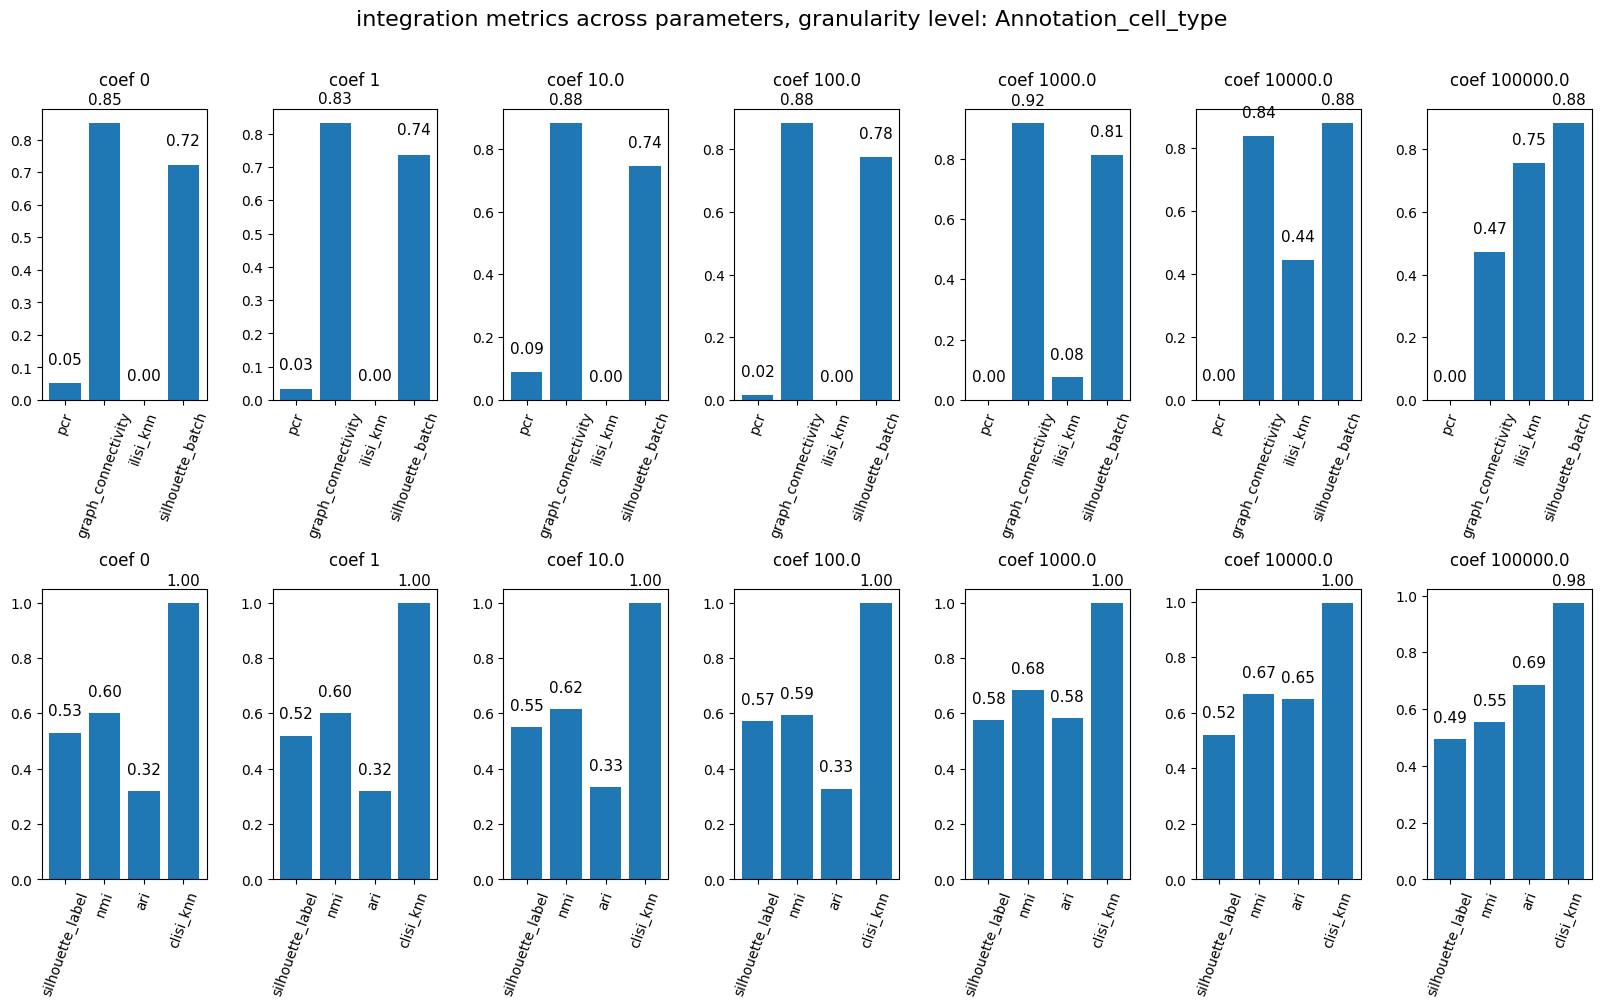

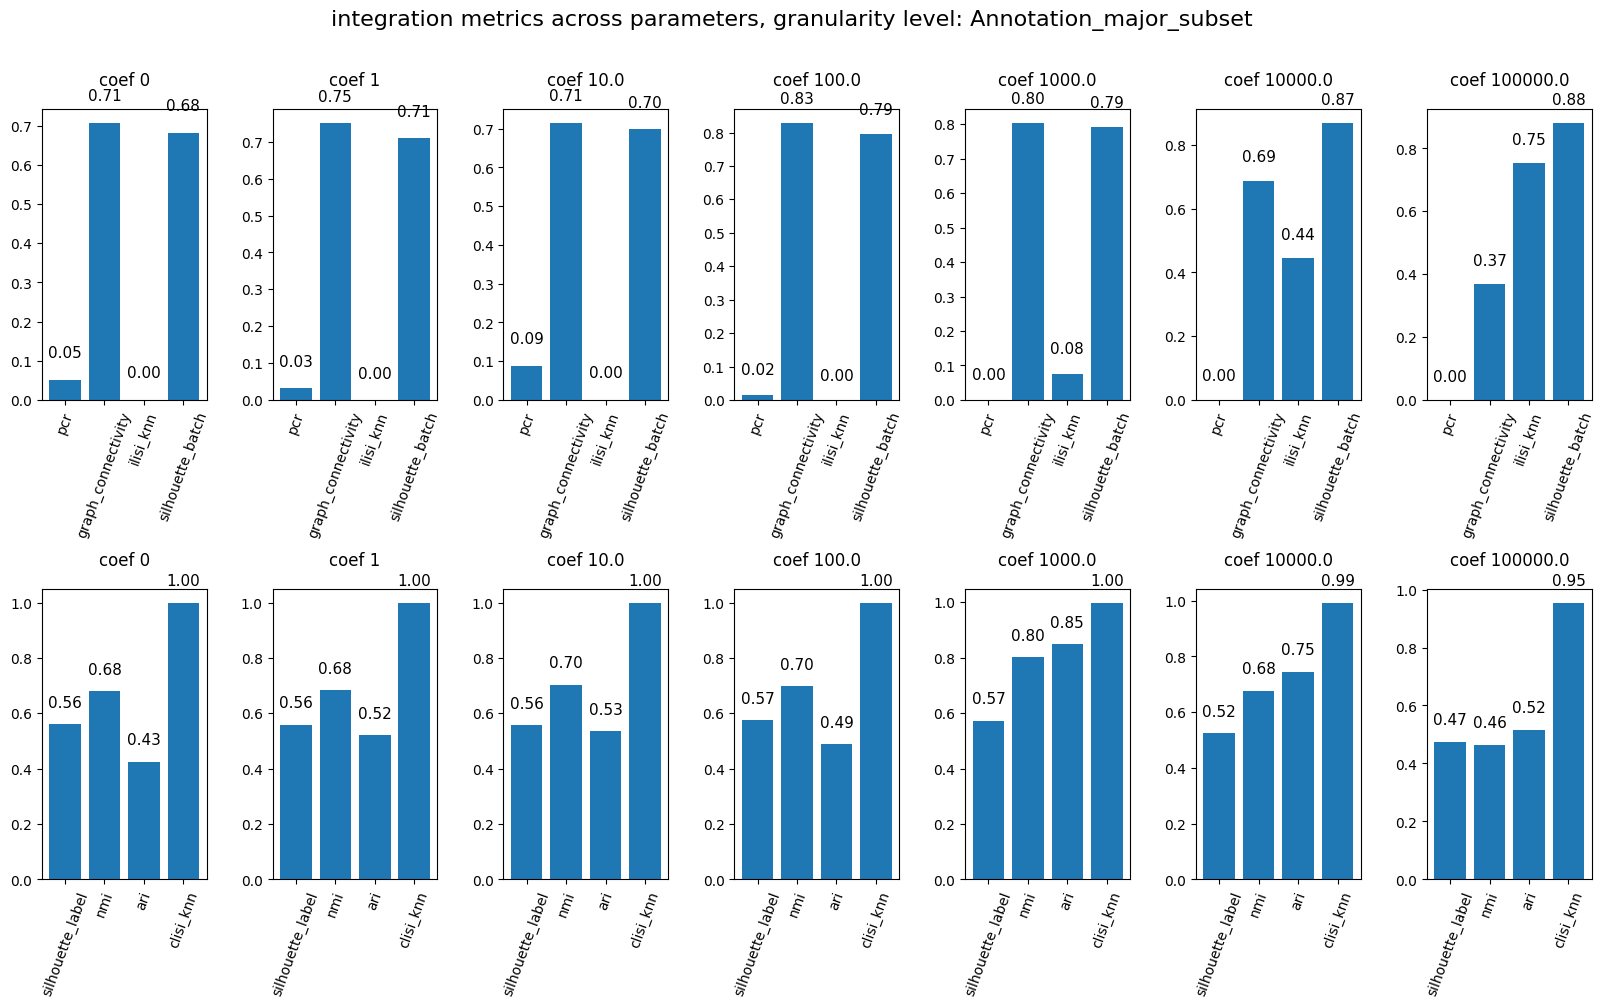

In [9]:
main()